## Linear_Regression使用矩陣計算

## 載入套件

In [1]:
import numpy as np

In [17]:
year=[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020]
pop=[2.53, 2.57, 2.62, 2.67, 2.71, 2.76, 2.81, 2.86, 2.92, 2.97, 3.03,
       3.08, 3.14, 3.2 , 3.26, 3.33, 3.4 , 3.47, 3.54, 3.62, 3.69, 3.77,
       3.84, 3.92, 4.  , 4.07, 4.15, 4.22, 4.3 , 4.37, 4.45, 4.53, 4.61,
       4.69, 4.78, 4.86, 4.95, 5.05, 5.14, 5.23, 5.32, 5.41, 5.49, 5.58,
       5.66, 5.74, 5.82, 5.9 , 5.98, 6.05, 6.13, 6.2 , 6.28, 6.36, 6.44,
       6.51, 6.59, 6.67, 6.75, 6.83, 6.92, 7.  , 7.08, 7.16, 7.24, 7.32,
       7.4 , 7.48, 7.56, 7.64, 7.72]

# 世界人口數預測

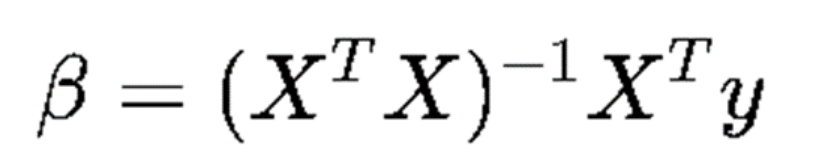

In [18]:
# 轉換為2維
X=np.array(year).reshape(-1, 1)
y=np.array(pop).reshape(-1, 1)
X.shape, y.shape

((71, 1), (71, 1))

In [19]:
# 設定 b 對應的 X，固定為 1
one=np.ones((X.shape[0], 1))#產生截距所需的部分
#print(one)
one.shape

(71, 1)

In [20]:
# X 結合 b 對應的 X
# 水平合併
X=np.concatenate((X, one), axis=1)
X.shape

(71, 2)

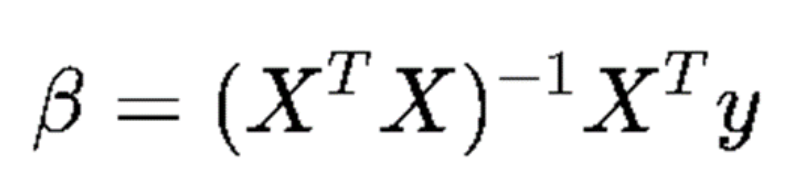

In [21]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[ 7.72102616e-02],
       [-1.48313919e+02]])

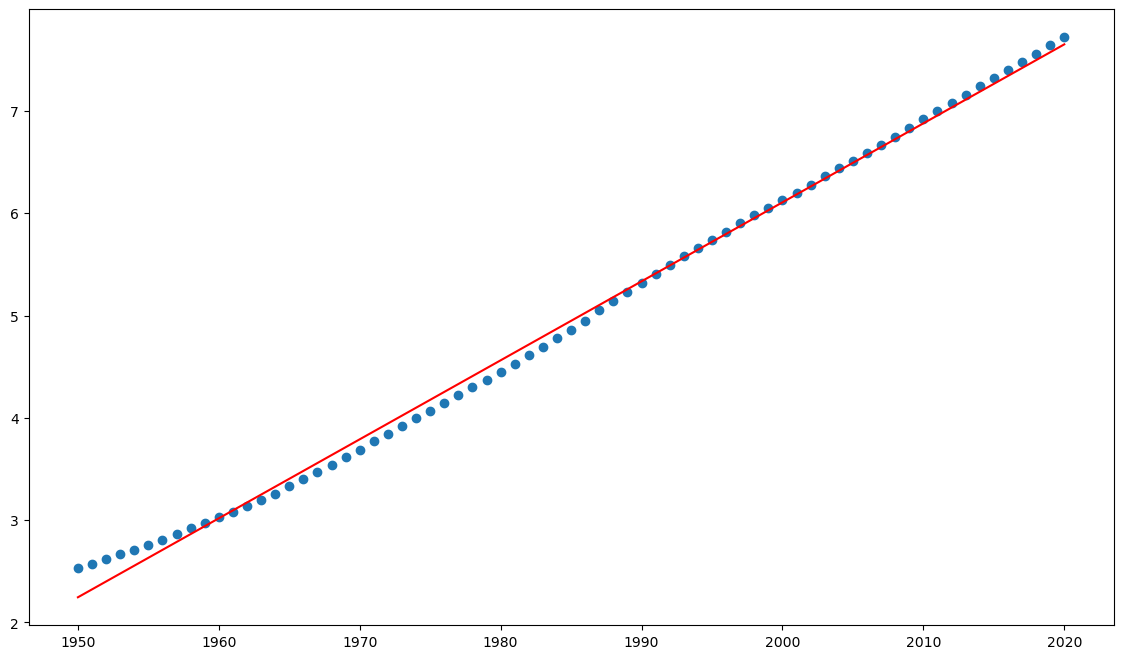

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.scatter(X[:, 0], y[:, 0])
plt.plot(X[:, 0], X[:, 0] * w[0,0] + w[1,0], 'r')
plt.show()

## Scikit-learn

In [23]:
# use sklearn LinearRegression
from sklearn.linear_model import LinearRegression

X=np.array(year).reshape(-1, 1)
y=np.array(pop)
reg = LinearRegression()
reg.fit(X, y)
reg.coef_, reg.intercept_

(array([0.07721026]), -148.31391851106642)

In [24]:
print(f'y = {reg.coef_[0]:.4f} * x + {reg.intercept_:.4f}')

y = 0.0772 * x + -148.3139


## 請問2050、2060年世界人口數=?

'107,392,203,219'

In [34]:
f'{(2050*reg.coef_[0]+reg.intercept_) * 10000000000:,.0f}'


'99,671,177,062'

In [35]:
f"{(2060 * reg.coef_[0] + reg.intercept_)* 10000000000 :,.0f}"

'107,392,203,219'

## 建立線性回歸模型儲存測試

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import joblib

In [43]:
df = pd.read_csv('./Advertising.csv')

In [39]:
X = df[['TV','radio','newspaper']]
y = df['sales']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [41]:
# 數據縮放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# 訓練模型
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [45]:
# 預測
y_pred = model.predict(X_test_scaled)

In [46]:
# 評估模型
mse = mean_squared_error(y_test, y_pred)
print(f"MSE:{mse}")

MSE:3.79679723671522


In [47]:
# 保存模型和縮放器
joblib.dump((model, scaler), 'scaled_sales_prediction_model.pkl')

['scaled_sales_prediction_model.pkl']

# Polynomial(多項式) Regression with SciKit-Learn


### 從數據預處理中導入 PolynomialFeatures，這將幫助我們通過添加多項式特徵來轉換原始數據集

我們將從以下形式的方程開始（這裡假設我們只有一個 x 特徵）：

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

然後，為某個多項式的度數 \(d\)，從原始的 x 特徵創建更多的特徵。

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_1^2 +  \ldots + \beta_dx_1^d + \epsilon$$

接著我們可以對這些新生成的多項式特徵進行線性回歸，因為實際上，我們只是將這些新的多項式特徵 $(x^2, x^3, \ldots, x^d) $ 當作新的特徵來處理。顯然，我們需要謹慎選擇正確的多項式度數 \(d\)（模型的度數），測試集上的指標結果將幫助我們確定這一點！

這種方法可以幫助我們擴展模型的表達能力，捕捉到數據中的非線性關係，從而提高模型的預測精度。


當使用 `PolynomialFeatures` 模塊時，如果將參數 `degree=2` 與 `include_bias=False` 設定，表示我們想生成二次多項式特徵，但不包括常數項（也就是截距項）。下面將用 LaTeX 格式詳細說明這一轉換過程：

### 原始特徵


$ \text{假設我們的原始特徵為}X=[x_1,x_2,x_3],$

### 二次多項式特徵

這會生成所有一次項、二次項及交互項的特徵。具體包括：

1.原始特徵的一次項：

$x_1,x_2,x_3$


2. 原始特徵的二次項：
$$x_1^2,x_2^2,x_3^2$$
### 3.原始特徵之間的交互項：
$$x_1x_2,x_1x_3,x_2x_3$$

因此，生成的二次多項式特徵可以表示為：

$X_{\mathrm{poly}}=[x_1,x_2,x_3,x_1^2,x_2^2,x_3^2,x_1x_2,x_1x_3,x_2x_3]$

### 具體公式

若用$\beta$表示回歸係數·用$\epsilon$表示誤差項·則二次多項式回歸模型可以表示為：
$$\hat{y}=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\beta_4x_1^2+\beta_5x_2^2+\beta_6x_3^2+\beta_7x_1x_2+\beta_8x_1x_3+\beta_9x_2x_3+\epsilon $$

由於設置了‘include\_bias=False’,這裡不包括常數項( $\beta_0$ )·因此實際的公式為：
$$\hat{y}=\beta_1x_1+\beta_2x_2+\beta_3x_3+\beta_4x_1^2+\beta_5x_2^2+\beta_6x_3^2+\beta_7x_1x_2+\beta_8x_1x_3+\beta_9x_2x_3+\epsilon $$

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("Advertising.csv")

In [50]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [52]:
# Everything BUT the sales column
X = df.drop('sales',axis=1)
y = df['sales']

In [55]:
from sklearn.preprocessing import PolynomialFeatures
#include_bias 是否需要算偏差值
#include_bias=False 因為LinearRegression 會算偏差值
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)



In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)


LinearRegression()

In [59]:
test_predictions = model.predict(X_test)

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
print("MSE:",MSE)
print("MAE:",MAE)

MSE: 0.44175055104035904
MAE: 0.48967980448037096
